In [7]:
"""
The Neural Network model
"""

import keras
import numpy as np
import os
from keras import backend as K
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Embedding, Input, RepeatVector
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import scikitplot.plotters as skplt
import matplotlib.pyplot as plt
from DataPreProcessing import doc2Vector


def baseline_model():
    '''3 hidden layers of Neural network'''
    model = Sequential()
    model.add(Dense(256, input_dim=300, activation='relu', kernel_initializer='normal'))
    model.add(Dropout(0.3))
    model.add(Dense(256, activation='relu', kernel_initializer='normal'))
    model.add(Dropout(0.5))
    model.add(Dense(80, activation='relu', kernel_initializer='normal'))
    model.add(Dense(2, activation="softmax", kernel_initializer='normal'))

    # gradient descent
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    
    # configure the learning process of the model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

def NN():
    
    if not os.path.isfile('./xtraining.npy') or not os.path.isfile('./xtesting.npy') or not os.path.isfile('./ytraining.npy') or not os.path.isfile('./ytesting.npy'):
        xtrain,xtest,ytrain,ytest = doc2Vector("data/train.csv")
        np.save('./xtraining', xtrain)
        np.save('./xtesting', xtest)
        np.save('./ytraining', ytrain)
        np.save('./ytesting', ytest)
    xtrain = np.load('./xtraining.npy')
    xtest = np.load('./xtesting.npy')
    ytrain = np.load('./ytraining.npy')
    ytest = np.load('./ytesting.npy')
    
    # Train the model
    model = baseline_model()
    #model.summary()
    x_train, x_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42)
    label_encoder = LabelEncoder()
    label_encoder.fit(y_train)
    encoded_y = np_utils.to_categorical((label_encoder.transform(y_train)))
    label_encoder.fit(y_test)
    encoded_y_test = np_utils.to_categorical((label_encoder.transform(y_test)))
    estimator = model.fit(x_train, encoded_y, epochs=20, batch_size=64)
    print("Model Trained!")
    score = model.evaluate(x_test, encoded_y_test)
    print("")
    print("Neural Network model accuracy = " + format(score[1]*100, '.2f') + "%")
    probabs = model.predict_proba(x_test)
    y_pred = np.argmax(probabs, axis=1) 
    # Plotting the confusion matrix for Neural Network model
    skplt.plot_confusion_matrix(y_test, y_pred, cmap='PuRd')
    plt.title('Neural Network Confusion Matrix')
    plt.show()

Epoch 1/20
13286/13286 [==============================] - 1s 74us/step - loss: 0.5110 - acc: 0.7483
Epoch 2/20
13286/13286 [==============================] - 1s 58us/step - loss: 0.2859 - acc: 0.8840
Epoch 3/20
13286/13286 [==============================] - 1s 56us/step - loss: 0.2544 - acc: 0.8989
Epoch 4/20
13286/13286 [==============================] - 1s 56us/step - loss: 0.2401 - acc: 0.9043
Epoch 5/20
13286/13286 [==============================] - 1s 50us/step - loss: 0.2252 - acc: 0.9086
Epoch 6/20
13286/13286 [==============================] - 1s 54us/step - loss: 0.2114 - acc: 0.9170: 0s - loss: 0.2131 -
Epoch 7/20
13286/13286 [==============================] - 1s 56us/step - loss: 0.2043 - acc: 0.9213
Epoch 8/20
13286/13286 [==============================] - 1s 51us/step - loss: 0.1967 - acc: 0.9234
Epoch 9/20
13286/13286 [==============================] - 1s 54us/step - loss: 0.1825 - acc: 0.9294
Epoch 10/20
13286/13286 [==============================] - 1s 55us/step - loss:

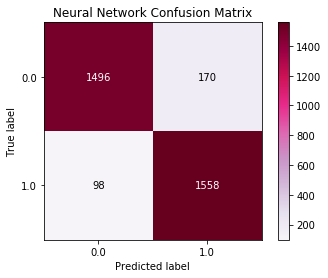

In [8]:
NN()